# t-distributed stochastic neighbor embedding

In [1]:
using TSne, Statistics, MLDatasets, Gadfly

## Load data

In [2]:
data, labels = MNIST.traindata(Float64);

## Reshape

In [3]:
data = reshape(permutedims(data[:, :, 1:2500], (3, 1, 2)),
               2500, size(data, 1)*size(data, 2));

## Normalize data, avoiding large scale differences

In [4]:
rescale(A; dims=1) = (A .- mean(A, dims=dims)) ./ max.(std(A, dims=dims), eps())

rescale (generic function with 1 method)

In [5]:
X = rescale(data, dims=1);

## Model

In [6]:
trans_X = tsne(X, 2, 50, 1000, 20.0);

┌ Warning: implicit `dims=2` argument now has to be passed explicitly to specify that distances between columns should be computed
│   caller = ip:0x0
└ @ Core :-1
Computing point perplexities100%|███████████████████████| Time: 0:00:04
Computing t-SNE  0%|                                    |  ETA: 0:06:30

Computing t-SNE  0%|▏                                   |  ETA: 0:02:49

Computing t-SNE  0%|▏                                   |  ETA: 0:02:40

Computing t-SNE  1%|▎                                   |  ETA: 0:02:20

Computing t-SNE  1%|▍                                   |  ETA: 0:02:06

Computing t-SNE  1%|▍                                   |  ETA: 0:01:58

Computing t-SNE  1%|▍                                   |  ETA: 0:01:57

Computing t-SNE  1%|▌                                   |  ETA: 0:01:50

Computing t-SNE  2%|▋                                   |  ETA: 0:01:47

Computing t-SNE  2%|▋                                   |  ETA: 0:01:45

Computing t-SNE  2%|▋             

## Plot

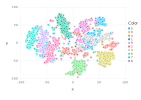

In [7]:
plot(x=trans_X[:, 1], y=trans_X[:, 2], color=string.(labels[1:size(trans_X, 1)]), Geom.point)